# Custom indicator example

In [ ]:

from mplchart.chart import Chart
from mplchart.helper import get_prices
from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, Volume

from dataclasses import dataclass


In [10]:
ticker = 'AAPL'
freq = 'daily'
prices = get_prices(ticker, freq=freq)
prices

,open,high,low,close,volume
date,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600
...,...,...,...,...,...
2022-08-01,160.786659,163.363082,160.666830,161.285965,67829400
2022-08-02,159.877927,162.184720,159.408578,159.788040,59907000
2022-08-03,160.616896,166.358920,160.527024,165.899567,82507500


In [11]:

@dataclass
class DEMA:
    """ Double Exponential Moving Average """
    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2



In [12]:
res = DEMA(20)(prices)
res.tail()


date
2022-08-01    157.192312
2022-08-02    158.137853
2022-08-03    160.035502
2022-08-04    161.584124
2022-08-05    162.846338
Name: close, dtype: float64

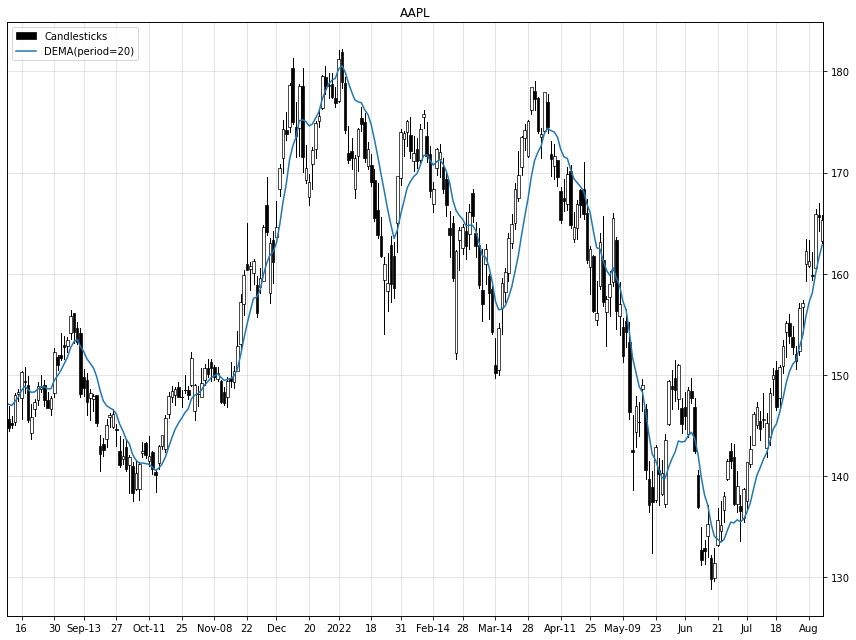

In [13]:
max_bars = 250

indicators = [
    Candlesticks(), DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
